In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
# reading the file
df = pd.read_csv('C:\\Documents\\Semester3\\OR 568\\Project\\vgsales Dataset.csv')

In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.isnull().sum().sum()

329

In [7]:
## Checking which columns contain null values
print(df['Rank'].isnull().sum())
print(df['Name'].isnull().sum())
print(df['Platform'].isnull().sum())
print(df['Year'].isnull().sum())
print(df['Genre'].isnull().sum())
print(df['Publisher'].isnull().sum())
print(df['NA_Sales'].isnull().sum())
print(df['EU_Sales'].isnull().sum())
print(df['JP_Sales'].isnull().sum())
print(df['Other_Sales'].isnull().sum())
print(df['Global_Sales'].isnull().sum())

0
0
0
271
0
58
0
0
0
0
0


In [8]:
print(df['Year'].isnull().sum())
print(df['Publisher'].isnull().sum())

271
58


In [9]:
df.Year= df.Year.fillna(df.Year.mean())

In [10]:
df.Year.head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: Year, dtype: float64

In [11]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [12]:
df.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Ultravision                     0.000060
Gaga                            0.000060
TYO                             0.000060
Riverhillsoft                   0.000060
Masque Publishing               0.000060
Name: Publisher, Length: 578, dtype: float64

In [13]:
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

In [14]:
df.Publisher.head()

0    Nintendo
1    Nintendo
2    Nintendo
3    Nintendo
4    Nintendo
Name: Publisher, dtype: object

In [15]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
data = df.copy()
le = LabelEncoder()

feature = ["Platform", "Genre","Publisher"]

In [17]:
for col in feature:
    data[col] = le.fit_transform(df[col])

In [18]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [19]:
data.describe()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,15.797988,2006.406443,4.928124,293.065008,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,8.392298,5.781197,3.762015,177.532850,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,7.000000,2003.000000,1.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,16.000000,2007.000000,5.000000,323.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,21.000000,2010.000000,8.000000,456.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,30.000000,2020.000000,11.000000,577.000000,41.490000,29.020000,10.220000,10.570000,82.740000


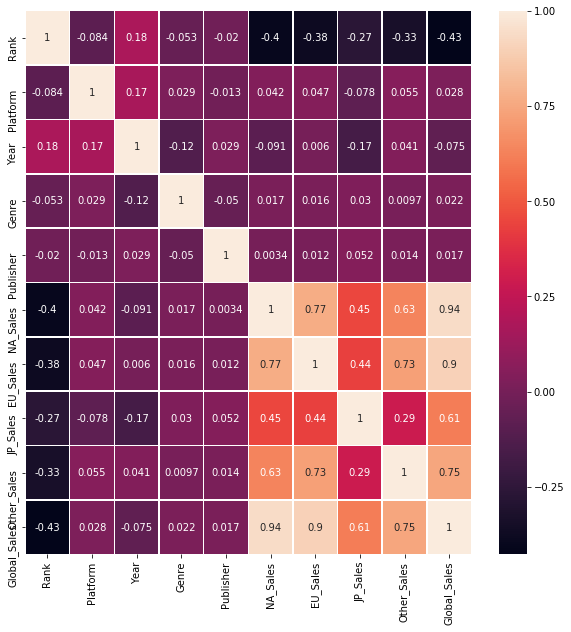

In [20]:
corrmatarix = data.corr()
top_variables = corrmatarix.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_variables].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [21]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values

X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 6), (13278,), (3320, 6), (3320,))

### Random Forest Regressor

In [23]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# calculating R2 value
print('R2 value:',r2_score(y_test, predictions))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
R2 value: 0.820547713531367
Accuracy: 95.37 %.


### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_reg = LinearRegression().fit(X_train, y_train)
Ypred=linear_reg.predict(X_test)
Ypred
linear_reg.score(X_test, y_test)
errors = abs(Ypred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print ("MAE:                ", metrics.mean_absolute_error(y_test,Ypred))
print ("RMSE:               ", math.sqrt(metrics.mean_squared_error(y_test,Ypred)))
print ("r2:                 ",linear_reg.score( X_test, y_test, sample_weight=None))

Mean Absolute Error: 0.0 degrees.
Accuracy: 97.04 %.
MAE:                 0.002990459697530946
RMSE:                0.005285537432856725
r2:                  0.9999928402231679


### Gradient Boosting Regressor

In [26]:
gradient_reg = GradientBoostingRegressor(random_state=0)
gradient_reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
Ypred=gradient_reg.predict(X_test)
Ypred
errors = abs(Ypred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# calculating R2 value
print('R2 value:',r2_score(y_test, Ypred))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
R2 value: 0.841268955444996
Accuracy: 85.66 %.


### SGD Regressor

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
regr.fit(X_train, y_train)
Ypred=regr.predict(X_test)
errors = abs(Ypred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)

# calculating R2 value
print('R2 value:',r2_score(y_test, Ypred))

mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
R2 value: 0.9999927881016628
Accuracy: 97.21 %.


### Decision Tree Regressor

In [28]:
dt =DecisionTreeRegressor(random_state=32)
dt.fit(X_train, y_train);
predictions = dt.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# calculating R2 value
print('R2 value:',r2_score(y_test, predictions))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.05 degrees.
R2 value: 0.8180496485983251
Accuracy: 94.06 %.


### SVR 

In [29]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=1000, gamma = 'auto')
svr_lin.fit(X_train, y_train)
# R squared
print('Coefficients for SVR linear  regression: ', svr_lin.coef_) # Coefficients
print('y-intercept for SVR linear regression:', svr_lin.intercept_ ) # y-intercept
y_pred_lin = svr_lin.predict(X_test)
print ('score using r2_score from metrics:', metrics.r2_score(y_test, y_pred_lin))


Coefficients for SVR linear  regression:  [[2.17019610e-04 3.46324655e-04 1.00376216e+00 9.91787750e-01
  9.86346559e-01 9.80421304e-01]]
y-intercept for SVR linear regression: [0.07652832]
score using r2_score from metrics: 0.9983709152995387


In [30]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          DecisionTreeRegressor(),
          SVR(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
DecisionTreeRegressor done.


C:\Users\anith\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR done.


C:\Users\anith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor done.


Text(0.5, 1.0, 'Comparison of Regression Models')

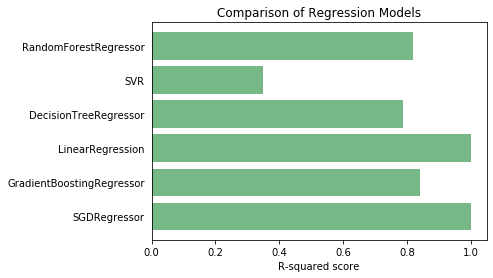

In [31]:
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')

In [ ]:
## Models                            Accuracy
Random Forest Regressor                95.37
DecisionTree Regressor                 94.60
Linear Regression                      97.04
GradiBoosting Regression               85.66
SGDRegressor                           97.21